In [1]:
!pip install underthesea

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 48.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.5/993.5 kB 50.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 657.8/657.8 kB 41.9 MB/s eta 0:00:00


In [2]:
import os
import json
from underthesea import word_tokenize, text_normalize
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def EDA_QA (qas, filename):
    qst_tokens = []
    ans_tokens = []
    num = len(qas)
    max_qst_len = max_ans_len = 0
    min_qst_len = min_ans_len = 1e9
    qst_len = []
    ans_len = []
    for id, qa in qas.items():
        qst = word_tokenize(text_normalize(qa['question']))
        qst_tokens += qst
        max_qst_len = max(max_qst_len, len(qst))
        min_qst_len = min(min_qst_len, len(qst))
        qst_len.append(len(qst))
        
        ans = word_tokenize(text_normalize(qa['answer']))
        ans_tokens += ans
        max_ans_len = max(max_ans_len, len(ans))
        min_ans_len = min(min_ans_len, len(ans))
        ans_len.append(len(ans))
    
    ### QUESTION ###
    # Get vocabulary size
    vocab_size = len(set(qst_tokens))
    print(f'Question vocabulary size: {vocab_size}')
    
    # plot the common words
    index = pd.Index(qst_tokens)
    common_vocabs = index.value_counts()[1:21] #exclude the ?
    
    plt.figure(figsize=(15,10))
    common_vocabs.plot.bar()
    plt.title('Common vocabs in questions - ' + filename + ' data')
    plt.xlabel("Token")
    plt.ylabel("Frequency")
    plt.savefig(filename + '_qst.png')
    plt.show()
    
    # analysis length
    qst_len = np.array(qst_len)    
    print(f'Average question length: {np.average(qst_len)}')
    print(f'Std question length: {np.std(qst_len)}')
    print(f'Min question length: {np.min(qst_len)}')
    print(f'Med question length: {np.median(qst_len)}')
    print(f'Max question length: {np.max(qst_len)}')
    
    ### ANSWER ###
    # Get vocabulary size
    print()
    vocab_size = len(set(ans_tokens))
    print(f'Answer vocabulary size: {vocab_size}')
    
    # plot the common words
    index = pd.Index(ans_tokens)
    common_vocabs = index.value_counts()[1:21] #exclude the ?
    
    plt.figure(figsize=(15,10))
    common_vocabs.plot.bar()
    plt.title('Common vocabs in answers ' + filename + ' data')
    plt.xlabel("Token")
    plt.ylabel("Frequency")
    plt.savefig(filename + '_ans.png')
    plt.show()
    
    # analysis length
    ans_len = np.array(ans_len)    
    print(f'Average answer length: {np.average(ans_len)}')
    print(f'Std answer length: {np.std(ans_len)}')
    print(f'Min answer length: {np.min(ans_len)}')
    print(f'Med answer length: {np.median(ans_len)}')
    print(f'Max answer length: {np.max(ans_len)}')
    

Number of training images: 9129
Number of training qa pairs: 30833
#QA / #images: 3.377478365647935
Question vocabulary size: 6133


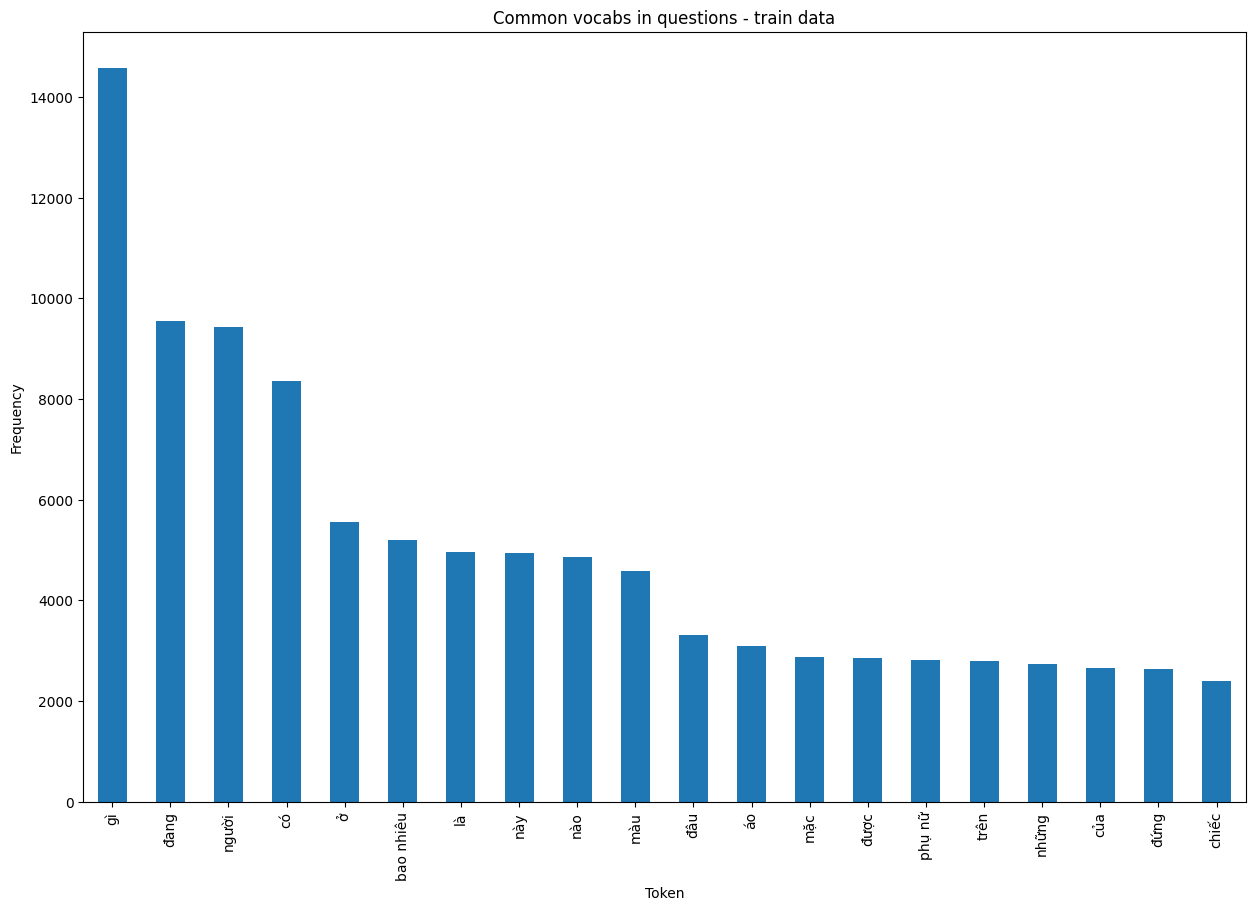

Average question length: 8.641585314435831
Std question length: 2.5858725636257684
Min question length: 3
Med question length: 8.0
Max question length: 27

Answer vocabulary size: 9317


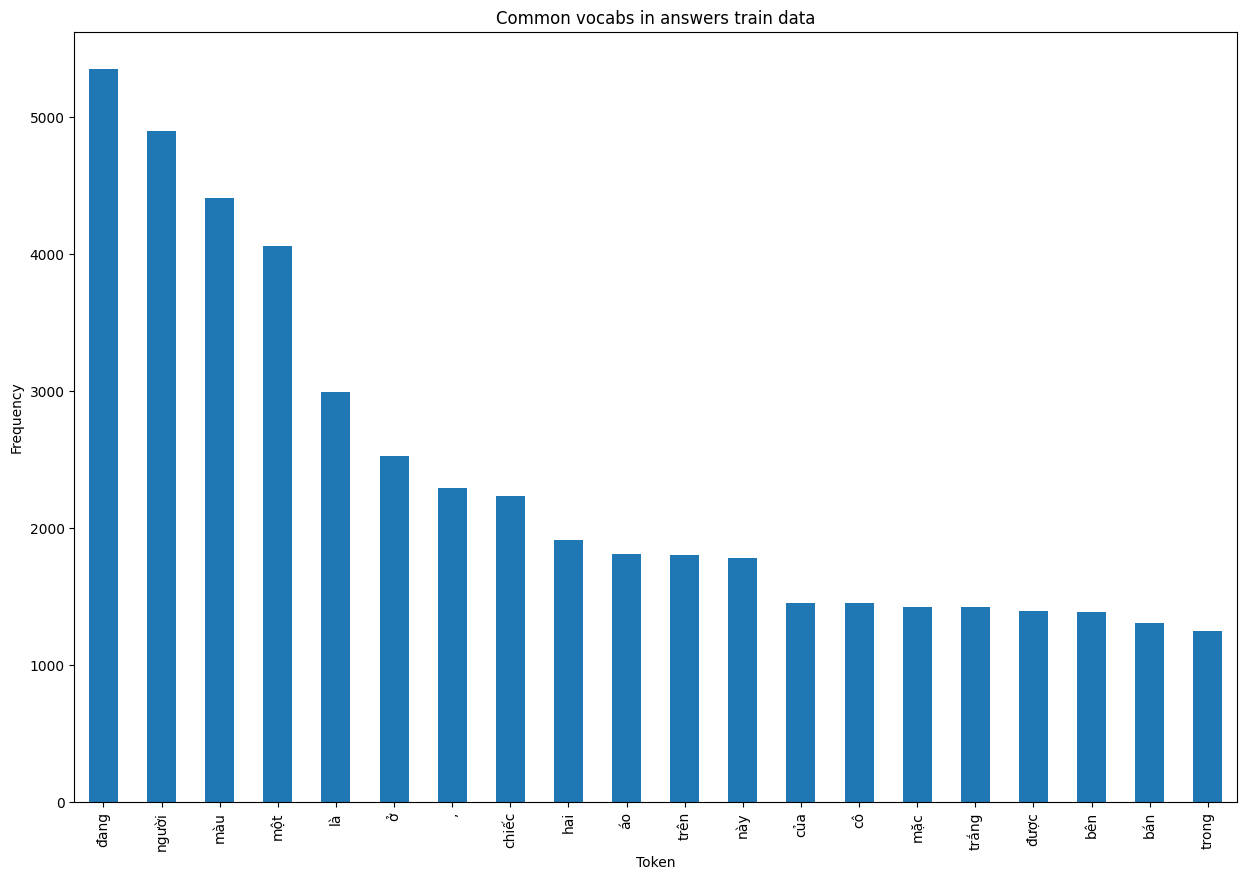

Average answer length: 5.767943437226348
Std answer length: 3.4061907201134334
Min answer length: 1
Med answer length: 5.0
Max answer length: 48


In [4]:
train_img = os.listdir('/kaggle/input/vlsp2023-dsvivrc/training-data/training-data/training-images/training-images')
num_img = len(train_img)

with open('/kaggle/input/vlsp2023-dsvivrc/training-data/training-data/vlsp2023_train_data.json') as f:
    data = json.load(f)
train_map = data['images']
train_qa = data['annotations']
num_qa = len(train_qa)

print(f'Number of training images: {num_img}')
print(f'Number of training qa pairs: {num_qa}')
print(f'#QA / #images: {num_qa / num_img}')

EDA_QA(train_qa, 'train')

Number of dev images: 1070
Number of dev qa pairs: 3545
#QA / #images: 3.3130841121495327
Question vocabulary size: 2073


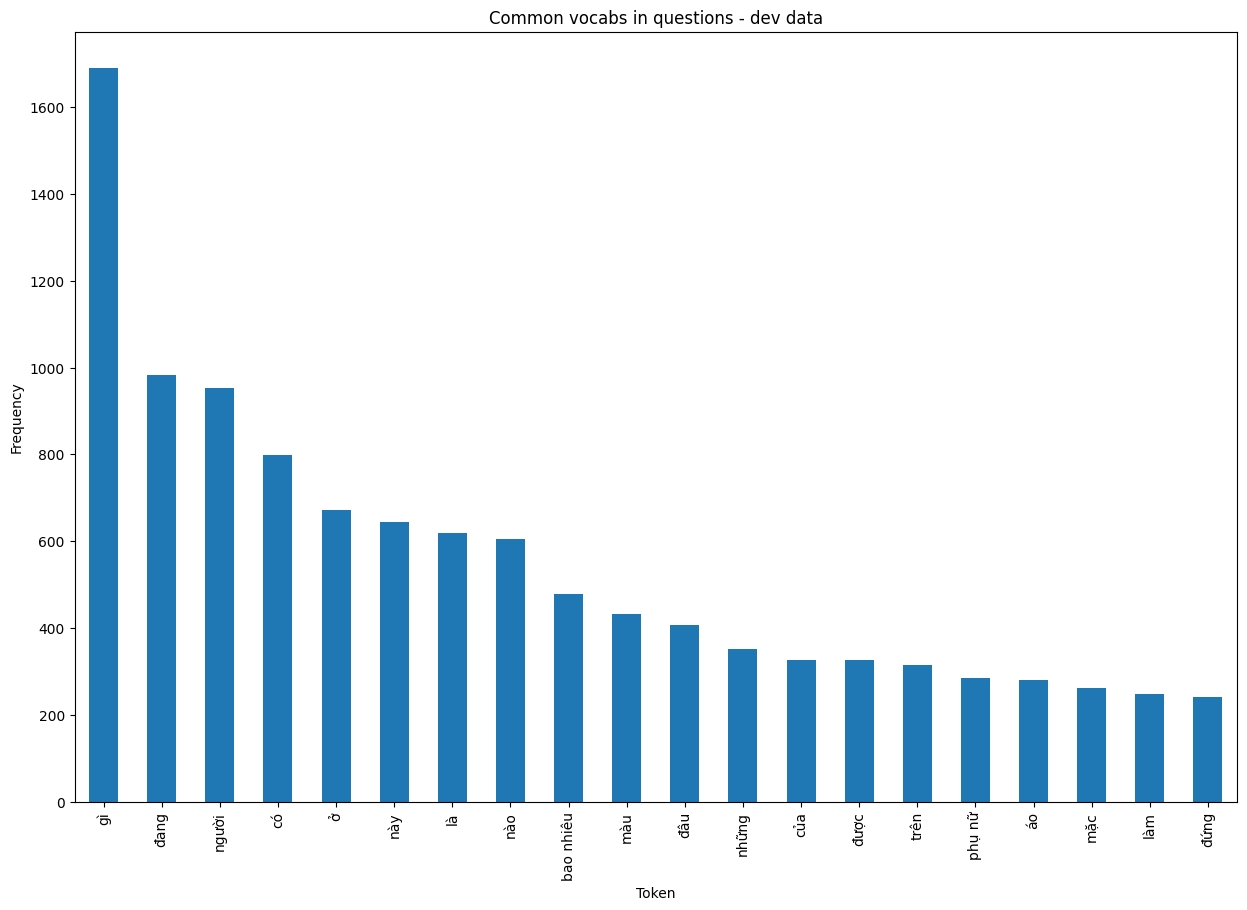

Average question length: 8.526657263751764
Std question length: 2.621691595762839
Min question length: 3
Med question length: 8.0
Max question length: 21

Answer vocabulary size: 2963


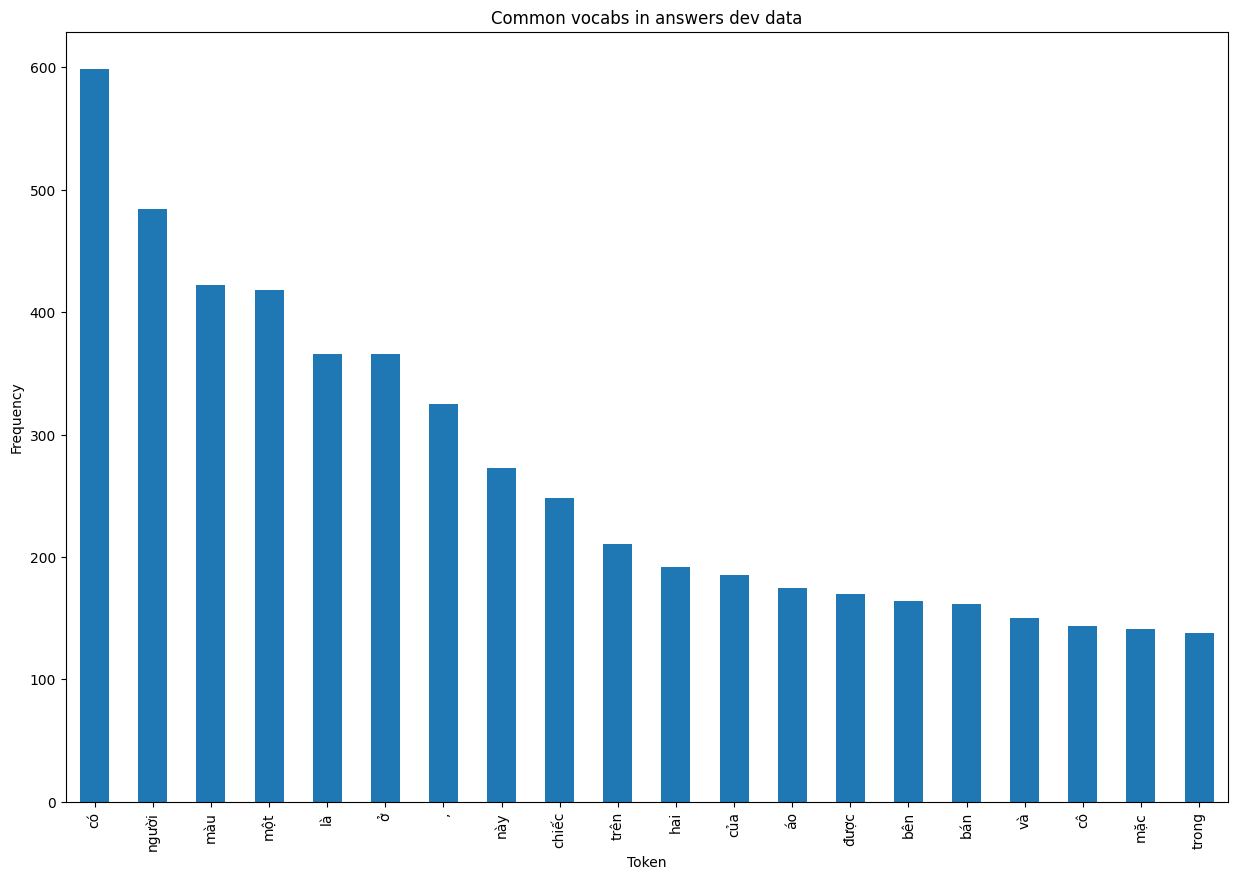

Average answer length: 6.041466854724964
Std answer length: 3.5639989731332955
Min answer length: 1
Med answer length: 6.0
Max answer length: 30


In [5]:
dev_img = os.listdir('/kaggle/input/vlsp2023-dsvivrc/dev-set/dev-set/dev-images/dev-images')
num_img = len(dev_img)

with open('/kaggle/input/vlsp2023-dsvivrc/dev-set/dev-set/vlsp2023_dev_data.json') as f:
    data = json.load(f)
dev_map = data['images']
dev_qa = data['annotations']
num_qa = len(dev_qa)

print(f'Number of dev images: {num_img}')
print(f'Number of dev qa pairs: {num_qa}')
print(f'#QA / #images: {num_qa / num_img}')

EDA_QA(dev_qa, 'dev')

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
def QA_cosine_sim (qas, filename):
    cosine = []
    vectorizer = TfidfVectorizer()
    qst = []
    ans = []
    for id, qa in qas.items():
        qst.append(qa['question'])
        ans.append(qa['answer'])
    vectorizer.fit(qst + ans)
    qst = vectorizer.transform(qst)
    ans = vectorizer.transform(ans)
    cosine = [cosine_similarity(q, a)[0][0] for q, a in zip(qst, ans)]

    print(len(cosine))
    
    plt.hist(cosine, bins=20, color='blue', density=True, alpha=0.7)
    plt.xlabel('Cosine Similarity')
    plt.ylabel('Frequency')
    plt.title('QA pairs Cosine Similarity - ' + filename + ' data')
    plt.savefig(filename + '_qa_cosine.png')
    plt.show()

In [7]:
def jaccard_similarity(a, b):
    a = set(a)
    b = set(b)
    j = float(len(a.intersection(b))) / len(a.union(b))
    return j

In [8]:
def QA_jaccard_sim (qas, filename):
    scores = []
    qst = []
    ans = []
    for id, qa in qas.items():
        q_tokens = word_tokenize(text_normalize(qa['question']))
        a_tokens = word_tokenize(text_normalize(qa['answer']))
        scores.append(jaccard_similarity(q_tokens, a_tokens))

    print(len(scores))
    
    plt.hist(scores, bins=20, color='blue', density=True, alpha=0.7)
    plt.xlabel('Jaccard Similarity')
    plt.ylabel('Frequency')
    plt.title('QA pairs Jaccard Similarity - ' + filename + ' data')
    plt.savefig(filename + '_qa_jaccard.png')
    plt.show()

In [9]:
def QA_length_Pearson(qas, filename):
    
    q_length = [len(word_tokenize(text_normalize(qa['question']))) for qa in qas.values()]
    a_length = [len(word_tokenize(text_normalize(qa['answer']))) for qa in qas.values()]

    # Calculate the Pearson correlation coefficient
    correlation_coefficient = np.corrcoef(q_length, a_length)[0, 1]

    # Create a scatter plot
    plt.scatter(q_length, a_length, color='blue', alpha=0.7)
    plt.xlabel('Length of question')
    plt.ylabel('Length of answer')
    plt.title(f'Pearson Correlation: {correlation_coefficient:.2f}')
    plt.grid(True)
    plt.savefig(filename + '_length_pearson.png')
    # Show the plot
    plt.show()

30833


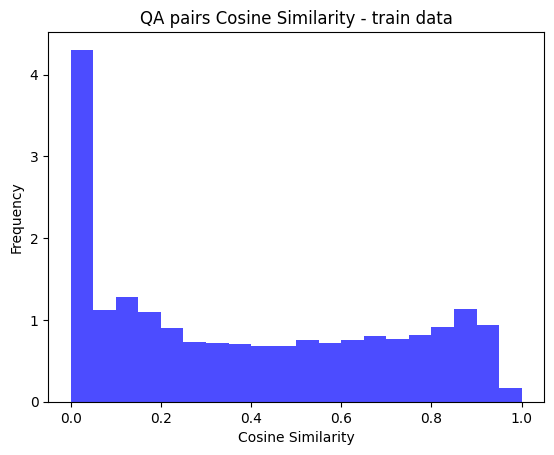

3545


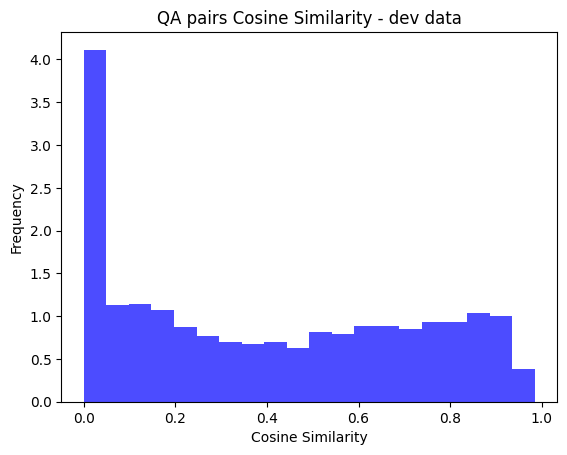

In [10]:
QA_cosine_sim(train_qa, 'train')
QA_cosine_sim(dev_qa, 'dev')

30833


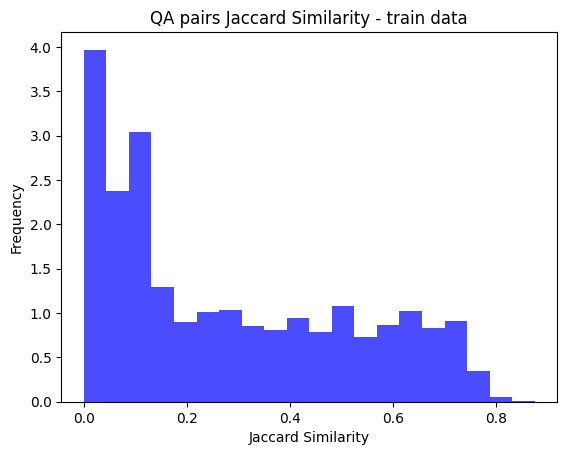

3545


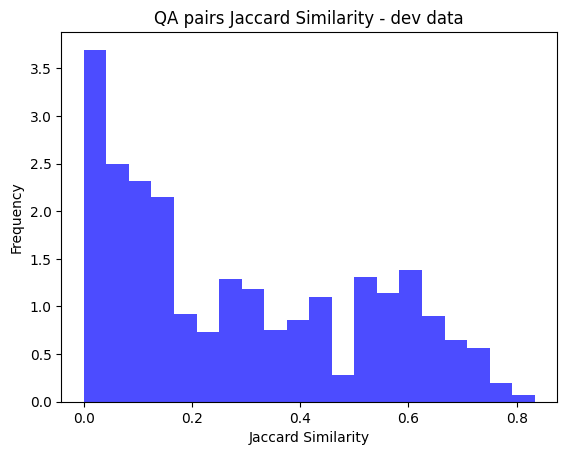

In [11]:
QA_jaccard_sim(train_qa, 'train')
QA_jaccard_sim(dev_qa, 'dev')

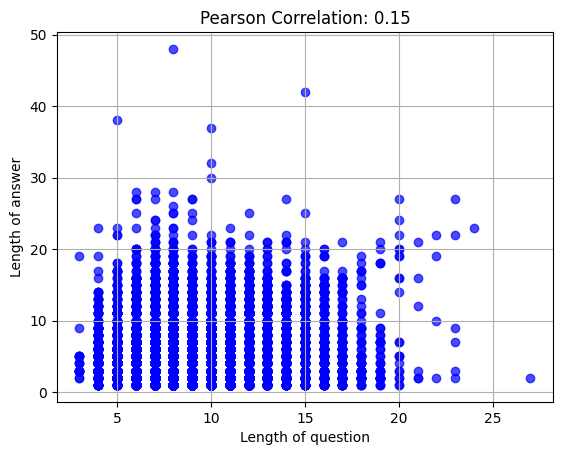

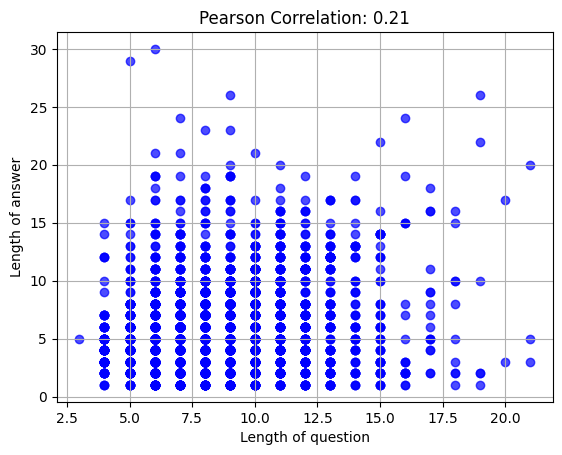

In [12]:
QA_length_Pearson(train_qa, 'train')
QA_length_Pearson(dev_qa, 'dev')